Number of knots for cubic spline model with df=4: 4
Number of knots for cubic spline model with df=10: 9
Number of knots for cubic spline model with df=16: 15


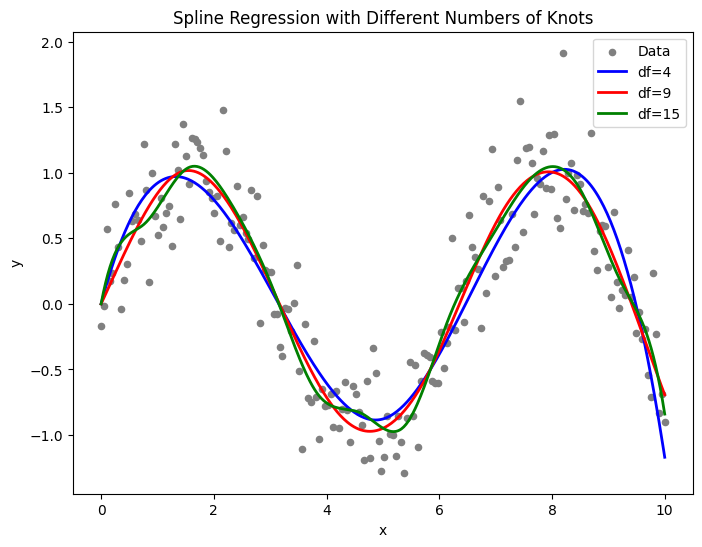

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.gam.api import BSplines
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(123)

# Simulate data: y = sin(x) + noise
n = 200
# Read the data from the CSV file
data = pd.read_csv("../_data/spline.csv")

# If you need to extract the 'x' and 'y' values:
x = data['x'].values
y = data['y'].values
# statsmodels expects exogenous variables as a 2D array:
x_2d = x[:, None]

# ---- Model 1: Using 4 degrees of freedom ----
# In this context, we set df=[4] which mimics R's bs(x, df=4) for a single predictor.
bs1 = BSplines(x_2d, df=[5], degree=[3])
# Fit OLS using the spline basis
model1 = sm.OLS(y, bs1.transform(x_2d)).fit()
# Extract knots; bs1.knots is a list (one array per predictor)
knots1 = bs1.basis.shape[1]
print("Number of knots for cubic spline model with df=4:", knots1)

# ---- Model 2: Using 10 degrees of freedom ----
bs2 = BSplines(x_2d, df=[10], degree=[3])
model2 = sm.OLS(y, bs2.transform(x_2d)).fit()
knots2 = bs2.basis.shape[1]
print("Number of knots for cubic spline model with df=10:", knots2)

# ---- Model 3: Using 16 degrees of freedom ----
bs3 = BSplines(x_2d, df=[16], degree=[3])
model3 = sm.OLS(y, bs3.transform(x_2d)).fit()
knots3 = bs3.basis.shape[1]
print("Number of knots for cubic spline model with df=16:", knots3)

# Create a fine grid for prediction
x_pred = np.linspace(0, 10, 500)[:, None]

# Generate predictions from the three models
y_pred1 = model1.predict(bs1.transform(x_pred))
y_pred2 = model2.predict(bs2.transform(x_pred))
y_pred3 = model3.predict(bs3.transform(x_pred))

# Plot the data and fitted curves
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="grey", s=20, label="Data")
plt.plot(x_pred.flatten(), y_pred1, color="blue", lw=2, label="df=4")
plt.plot(x_pred.flatten(), y_pred2, color="red", lw=2, label="df=9")
plt.plot(x_pred.flatten(), y_pred3, color="green", lw=2, label="df=15")
plt.title("Spline Regression with Different Numbers of Knots")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")
# Save the plot to a file (ensure that the directory '_images' exists)
plt.savefig("../_images/[SR]spline_regression_python.png", dpi=300)
plt.show()
